In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pneumococcus_data import data_observation
from Denmark_2001 import D2001

In [2]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()
Denmark_2001 = D2001()

In [3]:
countries = [Denmark.strain, Denmark_2001.strain]
common_strain = list(set.intersection(*map(set, countries)))
print(common_strain)
print(len(common_strain))

common_strain = ['11A', '17F', '7F', '20', '14', '10A', '38', '6B', '19F', '16F', '18C', '21', '19A', '23F', 
                 '18B', '4', '22F', '35F', '9V', '37', '3', '7B', '9N', '6A', '35B']

['11A', '17F', '7F', '20', '14', '10A', '38', '6B', '19F', '16F', '18C', '21', '19A', '23F', '18B', '4', '22F', '35F', '9V', '37', '3', '7B', '9N', '6A', '35B']
25


In [4]:
before = []
after = []
D01_strain = np.array(Denmark_2001.strain)
D10_strain = np.array(Denmark.strain)

D01_cases = np.array(Denmark_2001.cases)
D10_cases = np.array(Denmark.cases)

for i in range (0, len(common_strain)):
    find_01 = np.where(D01_strain == common_strain[i])
    index_01 = find_01[0]
    before.append(D01_cases[index_01])
    
    find_10 = np.where(D10_strain == common_strain[i])
    index_10 = find_10[0]
    after.append(D10_cases[index_10])

In [5]:
#create color list
# from random import randint
# colors = []

# for i in range(len(common_strain)):
#     colors.append('#%06X' % randint(0, 0xFFFFFF))

# print(colors)

colors = ['#5648B3', '#B5312C', '#9607CE', '#B7FB50', '#9FAB6C', '#9E2821', '#F788DC', '#935A09', 
          '#38F675', '#B81BA9', '#4DDF66', '#EDE09F', '#EC74E0', '#1DBEB7', '#190755', '#486677', 
          '#6F3DFB', '#65B937', '#6F6093', '#98A75F', '#6F588C', '#DEA754', '#047EAF', '#D1A09F', '#FBB60E']

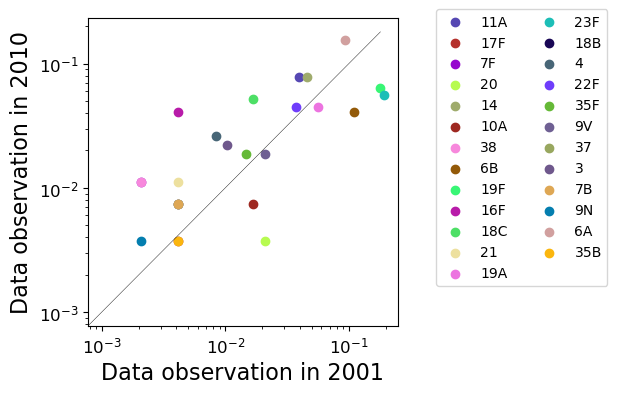

In [6]:
fig = plt.figure(figsize = (4, 4))
line = np.linspace(0, 0.18, 180)

for i in range (0, len(common_strain)):
    plt.scatter(before[i], after[i], color = colors[i], label = f'{common_strain[i]}')
    
plt.xlabel('Data observation in 2001', fontsize = 16)
plt.ylabel('Data observation in 2010', fontsize = 16)
plt.plot(line, line, color = 'k', linewidth = .3)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(axis='both', which='major', labelsize = 12)
plt.legend(bbox_to_anchor=(1.1, 1.05), ncol = 2)

#plt.title('Denmark serotype frequency \n in logarithmic scale', fontsize = 24)
# plt.xlim(0, 0.18)
# plt.ylim(0, 0.18)

plt.show()